In [1]:
import pandas as pd
import requests
from IPython.display import clear_output
import matplotlib.pyplot as plt

In [63]:
df = pd.read_csv('/Users/joelox87/opt/anaconda3/envs/DataBootCamp/GroupProject_1/Clinical.csv')

In [4]:
df.head()

,REGION,YEAR,TOTAL SPECIMENS,TOTAL A,TOTAL B,PERCENT POSITIVE,PERCENT A,PERCENT B
0,Alabama,2016,406,4,1,1.23,0.99,0.25
1,Arizona,2016,133,0,0,0.00,0.00,0.00
2,Arkansas,2016,47,0,0,0.00,0.00,0.00
3,California,2016,668,2,0,0.30,0.30,0.00
4,Colorado,2016,260,0,0,0.00,0.00,0.00


In [23]:
states = ['CA','TX','NY','FL','OH','OR','MO','AZ','MN','MD']
#states = ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
state_names = {'AZ':'Arizona','CA':'California','FL':'Florida','MD':'Maryland','MN':'Minnesota','MO':'Missouri','NY':'New York','OH':'Ohio','OR':'Oregon','TX':'Texas'}
#state_names = {'AL':'Alabama','AK':'Alaska','AZ':'Arizona','AR':'Arkansas','CA':'California','CO':'Colorado','CT':'Conneticut','DE':'Delaware','FL':'Florida','GA':'Georgia','HI':'Hawaii','ID':'Idaho','IL':'Illinois','IN':'Indiana','IA':'Iowa','KS':'Kansas','KY':'Kentucky','LA':'Louisiana','ME':'Maine','MD':'Maryland','MA':'Massachussetts','MI':'Michigan','MN':'Minnesota','MS':'Mississippi','MO':'Missouri','MT':'Montana','NE':'Nebraska','NV':'Nevada','NH':'New Hampshire','NJ':'New Jersey','NM':'New Mexico','NY':'New York','NC':'North Carolina','ND':'North Dakota','OH':'Ohio','OK':'Oklahoma','OR':'Oregon','PA':'Pennsylvania','RI':'Rhode Island','SC':'South Carolina','SD':'South Dakota','TN':'Tennessee','TX':'Texas','UT':'Utah','VT':'Vermont','VA':'Virginia','WA':'Washington','WV':'West Virgiania','WI':'Wisconsin','WY':'Wyoming','PR':'Puerto Rico'}

unique_states = df['REGION'].unique()
print(unique_states)

['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa'
 'Kansas' 'Kentucky' 'Louisiana' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'New Hampshire'
 'New Mexico' 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma'
 'Oregon' 'Pennsylvania' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia'
 'Wisconsin' 'Puerto Rico' 'Nevada' 'Maine' 'Alaska' 'Wyoming']


In [26]:

#state_names = {'MO':'MISSOURI', 'IL':'ILLINOIS', 'IA':'IOWA', 'KS':'KANSAS', 'TX':'TEXAS'}
#state_stations = {}
stations = []
for state in states:
    print(state)
    #state_stations[state] = []
    response = requests.get(f'https://www.ncdc.noaa.gov//homr/services/station/search?state={state}&platform=ASOS')
    response_json = response.json()
    station_collection = response_json['stationCollection']['stations']
    #print(station_collection[0])
    #pull the first 10 stations from each state
    for station in station_collection[0:5]:
        #state_name = state_names[state]
        station_id = station['identifiers'][0]['id']
        stations.append(station_id)
    clear_output(wait=True)

    #break

MD


In [32]:
#def get_data(year,stations):
url = 'https://www.ncei.noaa.gov/access/services/data/v1'
    
params = {
        'dataset':'daily-summaries',
        'startDate':f'2016-09-22',
        'endDate':f'2020-09-22',
        'format':'json',
        'includeStationLocation':1,
        'units':'standard',
        'stations':stations
}
    
response = requests.get(url, params)
response_json = response.json()

In [39]:
df = pd.DataFrame(response_json)

In [40]:
df.head()

,WSF2,STATION,WSF5,LONGITUDE,ELEVATION,PRCP,DATE,WDF2,AWND,WDF5,...,WT05,WT07,WT06,WT04,WT10,WT09,WDFG,WSFG,PSUN,TSUN
0,21.0,USW00023191,25.1,-118.41583,488.3,0.00,2016-09-22,260,10.96,270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,16.1,USW00023191,19.0,-118.41583,488.3,0.00,2016-09-23,240,7.16,260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.1,USW00023191,19.0,-118.41583,488.3,0.00,2016-09-24,260,7.83,310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19.9,USW00023191,27.1,-118.41583,488.3,0.00,2016-09-25,90,8.72,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13.0,USW00023191,16.1,-118.41583,488.3,0.00,2016-09-26,110,7.61,120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71528 entries, 0 to 71527
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSF2       71301 non-null  object
 1   STATION    71528 non-null  object
 2   WSF5       70926 non-null  object
 3   LONGITUDE  71528 non-null  object
 4   ELEVATION  71528 non-null  object
 5   PRCP       71184 non-null  object
 6   DATE       71528 non-null  object
 7   WDF2       71301 non-null  object
 8   AWND       71187 non-null  object
 9   WDF5       70924 non-null  object
 10  PGTM       13526 non-null  object
 11  TMAX       71220 non-null  object
 12  TMIN       71216 non-null  object
 13  LATITUDE   71528 non-null  object
 14  WT02       3683 non-null   object
 15  WT08       7456 non-null   object
 16  WT01       22332 non-null  object
 17  SNOW       27916 non-null  object
 18  SNWD       28283 non-null  object
 19  WT03       6835 non-null   object
 20  TAVG       23371 non-null  o

In [42]:
df = df.iloc[:,0:14]
df = df.drop(columns='PGTM')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71528 entries, 0 to 71527
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   WSF2       71301 non-null  object
 1   STATION    71528 non-null  object
 2   WSF5       70926 non-null  object
 3   LONGITUDE  71528 non-null  object
 4   ELEVATION  71528 non-null  object
 5   PRCP       71184 non-null  object
 6   DATE       71528 non-null  object
 7   WDF2       71301 non-null  object
 8   AWND       71187 non-null  object
 9   WDF5       70924 non-null  object
 10  TMAX       71220 non-null  object
 11  TMIN       71216 non-null  object
 12  LATITUDE   71528 non-null  object
dtypes: object(13)
memory usage: 7.1+ MB


In [43]:
df = df.dropna(how='any')

In [44]:
df.to_csv('/Users/joelox87/opt/anaconda3/envs/DataBootCamp/GroupProject_1/WeatherExport.csv', index=False)

In [45]:
df = df.reset_index(drop=True)

In [46]:
df['WSF2'] = df['WSF2'].astype('float')
df['WSF5'] = df['WSF5'].astype('float')
df['LONGITUDE'] = df['LONGITUDE'].astype('float')
df['ELEVATION'] = df['ELEVATION'].astype('float')
df['PRCP'] = df['PRCP'].astype('float')
df['DATE'] = pd.to_datetime(df['DATE'])
df['WDF2'] = df['WDF2'].astype('int')
df['AWND'] = df['AWND'].astype('float')
df['WDF5'] = df['WDF5'].astype('int')
df['TMAX'] = df['TMAX'].astype('int')
df['TMIN'] = df['TMIN'].astype('int')
df['LATITUDE'] = df['LATITUDE'].astype('float')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70387 entries, 0 to 70386
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   WSF2       70387 non-null  float64       
 1   STATION    70387 non-null  object        
 2   WSF5       70387 non-null  float64       
 3   LONGITUDE  70387 non-null  float64       
 4   ELEVATION  70387 non-null  float64       
 5   PRCP       70387 non-null  float64       
 6   DATE       70387 non-null  datetime64[ns]
 7   WDF2       70387 non-null  int64         
 8   AWND       70387 non-null  float64       
 9   WDF5       70387 non-null  int64         
 10  TMAX       70387 non-null  int64         
 11  TMIN       70387 non-null  int64         
 12  LATITUDE   70387 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(4), object(1)
memory usage: 7.0+ MB


In [48]:
df.head()

,WSF2,STATION,WSF5,LONGITUDE,ELEVATION,PRCP,DATE,WDF2,AWND,WDF5,TMAX,TMIN,LATITUDE
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405


In [49]:
column_dict = {
    'WSF2':'Fastest 2-minute wind speed (MPH)',
    'WSF5':'Fastest 5-minute wind speed (MPH)',
    'PRCP':'Precipitation (Inches)',
    'WDF2':'Direction of fastest 2-minute wind speed',
    'WDF5':'Direction of fastest 5-minute wind speed',
    'AWND':'Average daily wind speed (MPH)',
    'TMAX':'Maximum temperature (F)',
    'TMIN':'Minimum temperature (F)'
}
df = df.rename(columns=column_dict)

In [50]:
df.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405


In [51]:
df.to_csv('aggregated_weather.csv', index=False)

In [61]:
#print(stations)
#['CA','TX','NY','FL','OH','OR','MO','AZ','MN','MD']
station_ids = df['STATION']
station_states = []
for station_id in station_ids:
    if station_id in stations[0:4]:
        station_states.append('CA')
    elif station_id in stations[5:9]:
        station_states.append('TX')
    elif station_id in stations[10:14]:
        station_states.append('NY')
    elif station_id in stations[15:19]:
        station_states.append('FL')
    elif station_id in stations[20:24]:
        station_states.append('OH')
    elif station_id in stations[25:29]:
        station_states.append('OR')
    elif station_id in stations[30:34]:
        station_states.append('MO')
    elif station_id in stations[35:39]:
        station_states.append('AZ')
    elif station_id in stations[40:44]:
        station_states.append('MN')
    elif station_id in stations[45:49]:
        station_states.append('MD')
df['STATE'] = station_states

ValueError: Length of values (57543) does not match length of index (70387)

In [53]:
df['year'] = [d.strftime('%Y') for d in df['DATE']]
df.head()

,Fastest 2-minute wind speed (MPH),STATION,Fastest 5-minute wind speed (MPH),LONGITUDE,ELEVATION,Precipitation (Inches),DATE,Direction of fastest 2-minute wind speed,Average daily wind speed (MPH),Direction of fastest 5-minute wind speed,Maximum temperature (F),Minimum temperature (F),LATITUDE,year
0,21.0,USW00023191,25.1,-118.41583,488.3,0.0,2016-09-22,260,10.96,270,68,58,33.405,2016
1,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-23,240,7.16,260,74,59,33.405,2016
2,16.1,USW00023191,19.0,-118.41583,488.3,0.0,2016-09-24,260,7.83,310,85,69,33.405,2016
3,19.9,USW00023191,27.1,-118.41583,488.3,0.0,2016-09-25,90,8.72,80,93,76,33.405,2016
4,13.0,USW00023191,16.1,-118.41583,488.3,0.0,2016-09-26,110,7.61,120,97,80,33.405,2016


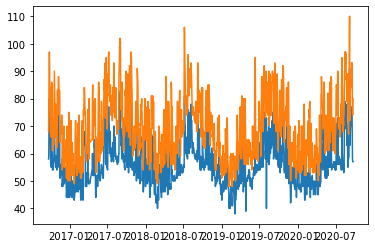

In [56]:
station = df['STATION'].unique()[0]
weather_to_graph = df.loc[(df['STATION'] == station)]
max_temp = weather_to_graph['Maximum temperature (F)']
min_temp = weather_to_graph['Minimum temperature (F)']
dates = weather_to_graph['DATE']

plt.plot(dates,min_temp)
plt.plot(dates,max_temp)